In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('credit_risk_dataset.csv')

In [7]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [8]:
dups = df.duplicated()

In [9]:
df[dups]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [10]:
df.query("person_age==23 & person_income==90000 & person_home_ownership == 'MORTGAGE' & loan_int_rate == 10.36")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
13281,23,90000,MORTGAGE,4.0,MEDICAL,B,4800,10.36,0,0.05,N,4
13298,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3


In [11]:
df.shape

(32581, 12)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(32416, 12)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [15]:
X, X_test, y, y_test = train_test_split(df.drop('loan_status', axis=1), df['loan_status'],
                                        random_state=0,  test_size=0.2, stratify=df['loan_status'],
                                        shuffle=True)

In [16]:
df["loan_status"].value_counts(normalize=True)

,proportion
loan_status,
0,0.781312
1,0.218688


In [17]:
y.value_counts(normalize=True)

,proportion
loan_status,
0,0.781313
1,0.218687


In [18]:
np.round(X.isna().sum()* 100 / X.shape[0], 3)

,0
person_age,0.000
person_income,0.000
person_home_ownership,0.000
person_emp_length,2.800
loan_intent,0.000
loan_grade,0.000
loan_amnt,0.000
loan_int_rate,9.614
loan_percent_income,0.000
cb_person_default_on_file,0.000


In [19]:
X.shape

(25932, 11)

In [20]:
(25932-22763)/25932

0.12220422643837729

In [21]:
X.dropna()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
21415,33,48000,OWN,11.0,HOMEIMPROVEMENT,B,10000,9.99,0.21,N,8
12916,25,85000,MORTGAGE,5.0,DEBTCONSOLIDATION,C,7500,11.03,0.09,Y,3
2938,26,125000,RENT,10.0,MEDICAL,B,3000,12.21,0.02,N,4
19114,29,62000,RENT,4.0,DEBTCONSOLIDATION,C,2300,13.43,0.04,Y,6
6057,24,48000,MORTGAGE,4.0,MEDICAL,B,4200,11.99,0.09,N,4
...,...,...,...,...,...,...,...,...,...,...,...
23921,29,67422,MORTGAGE,13.0,EDUCATION,B,12800,11.49,0.19,N,8
27783,29,195000,MORTGAGE,5.0,VENTURE,C,3600,14.26,0.02,N,7
24358,27,72000,OWN,2.0,EDUCATION,B,12000,9.99,0.17,N,9
2544,23,30000,RENT,0.0,MEDICAL,A,3000,5.79,0.10,N,3


In [22]:
X[['person_income', 'loan_amnt', 'loan_percent_income']].head()

,person_income,loan_amnt,loan_percent_income
21415,48000,10000,0.21
12916,85000,7500,0.09
2938,125000,3000,0.02
19114,62000,2300,0.04
6057,48000,4200,0.09


from matplotlib import pyplot as plt
_df_0['person_income'].plot(kind='hist', bins=20, title='person_income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['loan_amnt'].plot(kind='hist', bins=20, title='loan_amnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['loan_percent_income'].plot(kind='hist', bins=20, title='loan_percent_income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='person_income', y='loan_amnt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='loan_amnt', y='loan_percent_income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['person_income'].plot(kind='line', figsize=(8, 4), title='person_income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['loan_amnt'].plot(kind='line', figsize=(8, 4), title='loan_amnt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['loan_percent_income'].plot(kind='line', figsize=(8, 4), title='loan_percent_income')
plt.gca().spines[['top', 'right']].set_visible(False)

In [23]:
X.drop('loan_percent_income', axis=1, inplace=True)
X_test.drop('loan_percent_income', axis=1, inplace=True)

In [24]:

for col in X:
    print(col, '--->', X[col].nunique())
    if X[col].nunique()<20:
        print(X[col].value_counts(normalize=True)*100)
    print()

person_age ---> 58

person_income ---> 3680

person_home_ownership ---> 4
person_home_ownership
RENT        50.320068
MORTGAGE    41.439149
OWN          7.916859
OTHER        0.323924
Name: proportion, dtype: float64

person_emp_length ---> 36

loan_intent ---> 6
loan_intent
EDUCATION            19.809502
MEDICAL              18.787598
VENTURE              17.542033
PERSONAL             16.878760
DEBTCONSOLIDATION    15.968687
HOMEIMPROVEMENT      11.013420
Name: proportion, dtype: float64

loan_grade ---> 7
loan_grade
A    32.932284
B    32.126330
C    19.902052
D    11.121394
E     3.004010
F     0.732685
G     0.181243
Name: proportion, dtype: float64

loan_amnt ---> 710

loan_int_rate ---> 346

cb_person_default_on_file ---> 2
cb_person_default_on_file
N    82.392411
Y    17.607589
Name: proportion, dtype: float64

cb_person_cred_hist_length ---> 29



In [25]:
X.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
count,25932.000000,2.593200e+04,25206.000000,25932.000000,23439.000000,25932.000000
mean,27.721155,6.589884e+04,4.811315,9611.395187,11.013784,5.793460
std,6.382311,6.333831e+04,4.172822,6339.054572,3.240104,4.052297
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,2.000000
25%,23.000000,3.849500e+04,2.000000,5000.000000,7.900000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,4.000000
75%,30.000000,7.900000e+04,7.000000,12250.000000,13.480000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,30.000000


In [26]:
num_cols = [col for col in X if X[col].dtypes != 'O']
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'cb_person_cred_hist_length']

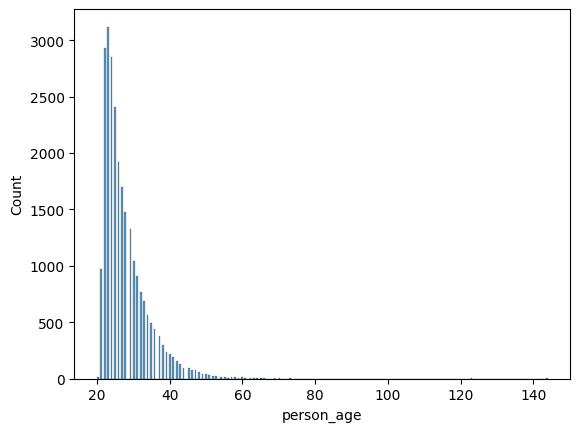

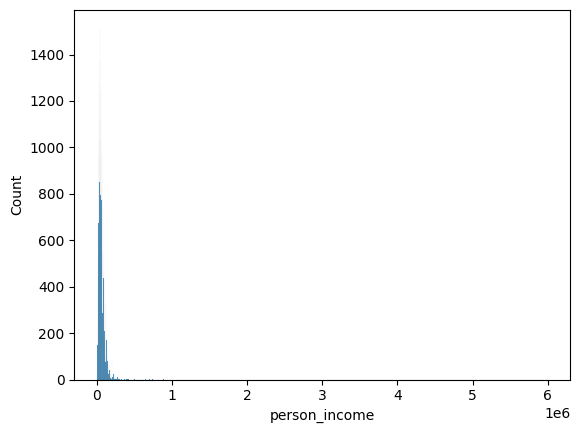

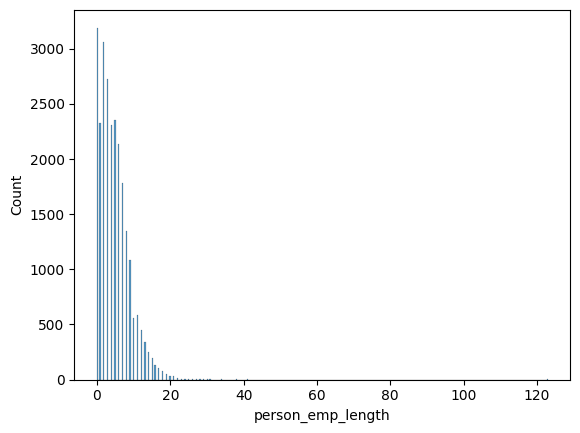

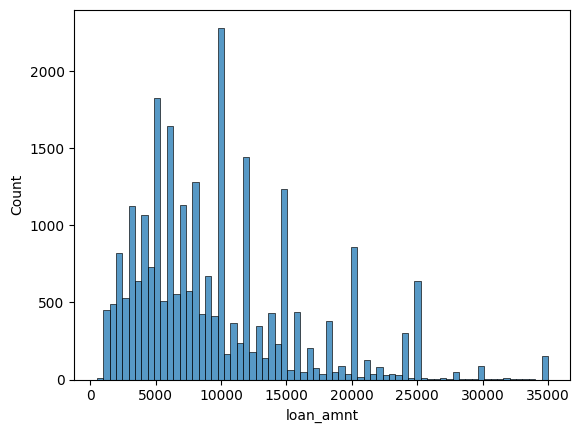

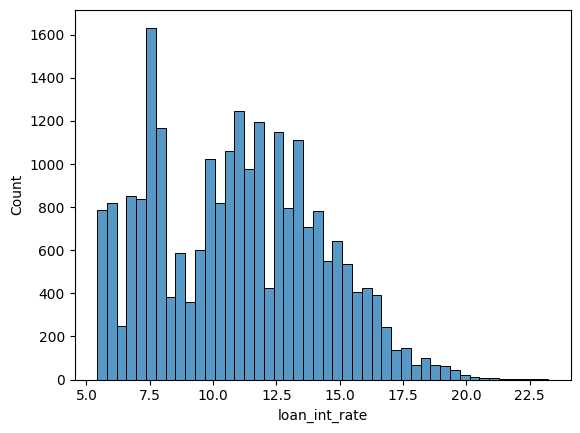

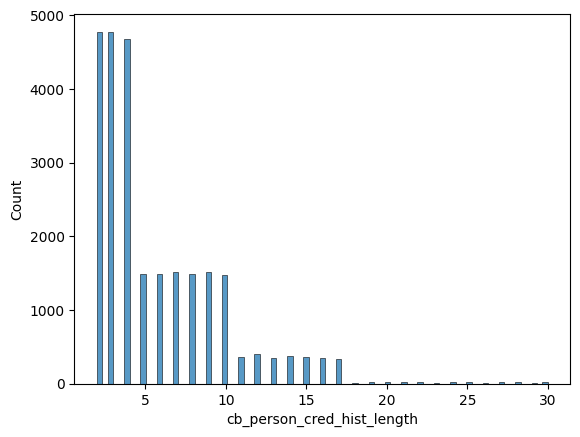

In [27]:
import seaborn as sns
for col in num_cols:
    sns.histplot(X[col])
    plt.show()

In [28]:
X.loc[X['person_age']>=80, :]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
32422,80,64000,RENT,7.0,MEDICAL,B,6800,11.71,N,25
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,N,3
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,N,27
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,N,4
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,N,3
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,N,24
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,N,25


In [29]:
X = X.loc[X['person_age']<80, :]

In [30]:
X.shape

(25924, 10)

In [31]:
X = X.loc[X['person_age']<80, :]

In [32]:
X.loc[X['person_emp_length']>=66, :]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,N,4
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,Y,3


In [33]:
df.query("person_age<=person_emp_length+14")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [34]:
X = X.loc[(X['person_emp_length']<66) | (X['person_emp_length'].isna()), :]

In [35]:
y = y[X.index]

In [36]:
cat_cols = [col for col in X if X[col].dtypes == 'O']
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [37]:
num_pipe = Pipeline([
    ('impute', IterativeImputer()),
    ('scale', StandardScaler()),
])

In [38]:
ct = ColumnTransformer([
    ('num_pipe', num_pipe, num_cols),
    ('cat_cols', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [40]:
grid = {
    RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced'):
    {'model__n_estimators':[300,400,500],
     'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},

    LGBMClassifier(class_weight='balanced', random_state=0, n_jobs=-1):
    {'model__n_estimators':[300,400,500],
     'model__learning_rate':[0.001,0.01,0.1,1,10],
     'model__boosting_type': ['gbdt', 'goss', 'dart'],
     'coltf__num_pipe__impute__estimator':[LinearRegression(), RandomForestRegressor(random_state=0),
                                        KNeighborsRegressor()]},
}

In [41]:
for clf , param in grid.items():
    print(clf)
    print("-"*50)
    print(param)
    print("-"*50)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)
--------------------------------------------------
{'model__n_estimators': [300, 400, 500], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}
--------------------------------------------------
LGBMClassifier(class_weight='balanced', n_jobs=-1, random_state=0)
--------------------------------------------------
{'model__n_estimators': [300, 400, 500], 'model__learning_rate': [0.001, 0.01, 0.1, 1, 10], 'model__boosting_type': ['gbdt', 'goss', 'dart'], 'coltf__num_pipe__impute__estimator': [LinearRegression(), RandomForestRegressor(random_state=0), KNeighborsRegressor()]}
--------------------------------------------------


In [42]:
full_df =  pd.DataFrame()
best_algos = {}

In [43]:
for clf , param in grid.items():
    pipe = Pipeline([
        ("coltf" , ct),
        ("model", clf)
    ])
    gs =  RandomizedSearchCV(estimator=pipe , param_distributions=param, scoring="accuracy" , n_jobs=-1 , verbose=3 , n_iter=4 , random_state=0)
    gs.fit(X, y) #4*5

    all_res = pd.DataFrame(gs.cv_results_)

    temp =  all_res.loc[:,["params" , "mean_test_score"]]
    algo_name = str(clf).split('(')[0]
    temp['algo'] = algo_name
    full_df = pd.concat([full_df, temp], ignore_index=True)
    best_algos[algo_name] = gs.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5670, number of negative: 20252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 25922, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


In [45]:
best_algos

{'RandomForestClassifier': Pipeline(steps=[('coltf',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('num_pipe',
                                                   Pipeline(steps=[('impute',
                                                                    IterativeImputer(estimator=RandomForestRegressor(random_state=0))),
                                                                   ('scale',
                                                                    StandardScaler())]),
                                                   ['person_age',
                                                    'person_income',
                                                    'person_emp_length',
                                                    'loan_amnt', 'loan_int_rate',
                                                    'cb_person_cred_hist_length']),
                                                  ('cat_cols',
      

In [46]:
all_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__learning_rate,param_model__boosting_type,param_coltf__num_pipe__impute__estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,94.064295,14.193087,0.099089,0.011029,300,0.001,dart,KNeighborsRegressor(),"{'model__n_estimators': 300, 'model__learning_...",0.871553,0.860366,0.869406,0.865548,0.879051,0.869185,0.006229,2
1,73.555018,3.594210,0.109116,0.003778,300,0.010,dart,LinearRegression(),"{'model__n_estimators': 300, 'model__learning_...",0.872903,0.864031,0.870949,0.865548,0.869985,0.868683,0.003350,3
2,92.716220,3.683503,0.174117,0.034153,300,0.001,gbdt,RandomForestRegressor(random_state=0),"{'model__n_estimators': 300, 'model__learning_...",0.867502,0.866345,0.861304,0.866319,0.861111,0.864516,0.002736,4
3,79.422742,9.212388,0.191624,0.079348,300,0.100,dart,KNeighborsRegressor(),"{'model__n_estimators': 300, 'model__learning_...",0.905689,0.905111,0.912809,0.908179,0.908951,0.908148,0.002744,1


In [47]:
full_df.sort_values('mean_test_score', ascending=False)

,params,mean_test_score,algo
3,"{'model__n_estimators': 400, 'coltf__num_pipe_...",0.922730,RandomForestClassifier
0,"{'model__n_estimators': 400, 'coltf__num_pipe_...",0.922537,RandomForestClassifier
2,"{'model__n_estimators': 400, 'coltf__num_pipe_...",0.922537,RandomForestClassifier
1,"{'model__n_estimators': 500, 'coltf__num_pipe_...",0.922537,RandomForestClassifier
7,"{'model__n_estimators': 300, 'model__learning_...",0.908148,LGBMClassifier
4,"{'model__n_estimators': 300, 'model__learning_...",0.869185,LGBMClassifier
5,"{'model__n_estimators': 300, 'model__learning_...",0.868683,LGBMClassifier
6,"{'model__n_estimators': 300, 'model__learning_...",0.864516,LGBMClassifier


In [48]:
random = best_algos["RandomForestClassifier"]
random

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=RandomForestRegressor(random_state=0))),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=400, n_jobs=-1,
                                        random_state=0))])

In [52]:
lgbm = best_algos["LGBMClassifier"]
lgbm

Pipeline(steps=[('coltf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   IterativeImputer(estimator=KNeighborsRegressor())),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model',
                 LGBMClassifier(boosting_type='dart', class_weight='balanced',
                                n_estimators=300, n_jobs=-1, random_state=0))])

In [53]:
pred_random = random.predict(X_test)

In [54]:
pred_lgbm = lgbm.predict(X_test)

In [55]:
from sklearn.metrics import classification_report , confusion_matrix
report_random =  classification_report(y_test , pred_random)
print(report_random)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5066
           1       0.94      0.69      0.80      1418

    accuracy                           0.92      6484
   macro avg       0.93      0.84      0.88      6484
weighted avg       0.93      0.92      0.92      6484



In [56]:
report_lgbm =  classification_report(y_test , pred_lgbm)
print(report_lgbm)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5066
           1       0.81      0.78      0.80      1418

    accuracy                           0.91      6484
   macro avg       0.87      0.87      0.87      6484
weighted avg       0.91      0.91      0.91      6484



In [57]:
random.score(X_test , y_test)

0.9236582356570019

In [58]:
lgbm.score(X_test , y_test)

0.9117828500925355

In [59]:
a, b, c = learning_curve(random, X, y, n_jobs=-1, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


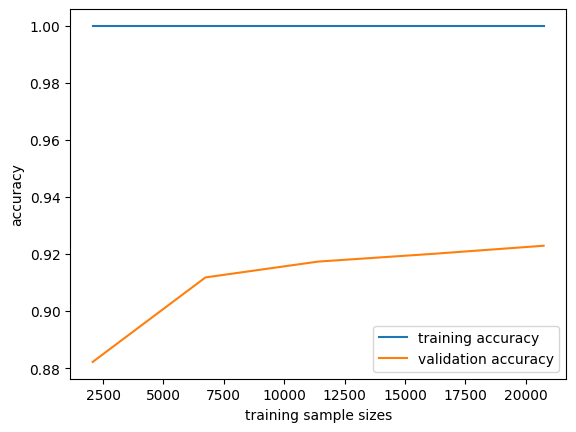

In [60]:
plt.plot(a, b.mean(axis=1), label='training accuracy')
plt.plot(a, c.mean(axis=1),  label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()

In [61]:
a1, b1, c1 = learning_curve(lgbm, X, y, n_jobs=-1, scoring='accuracy')

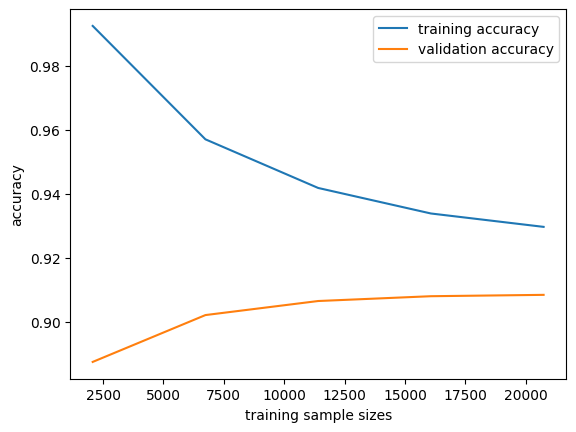

In [62]:
plt.plot(a1, b1.mean(axis=1), label='training accuracy')
plt.plot(a1, c1.mean(axis=1),  label='validation accuracy')
plt.xlabel('training sample sizes')
plt.ylabel('accuracy')
plt.legend()